# Tennis Swing Detection Using Time Series Analysis

Using Catapult wearable devices and shadow swinging (due to COVID-19 restrictions), we generated a dataset that includes forehand swings and backhand swings. This notebook utilizes the 100hz dataset from Catapult wearable devices to identify the role of rotation and acceleration within swing detection, and apply these metrics to perform a swing detection analysis across the dataset. 

In [2]:
# import necessary packages for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

### Load in 100hz Shadow Swinging Dataset

In [3]:
# import swing detection dataset from Catapult GPS device
swing_detection_data = pd.read_csv('../Datasets/karthik_swing_detection_100hz.csv')
swing_detection_data.head()

,TimeStamp,Acceleration.forward,Acceleration.side,Acceleration.up,Rotation.roll,Rotation.pitch,Rotation.yaw,RawPlayerLoad,SmoothedPlayerLoad,imuAcceleration.forward,...,Longitude,Odometer,RawVelocity,SmoothedVelocity,GNSS.LPS.Acceleration,MetabolicPower,GNSS.Fix,GNSS.Strength,GNSS.HDOP,HeartRate
0,00:00.0,-0.922020,-0.008228,0.257004,-12.688,-4.941,4.270,0.506348,0.097728,-0.917566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,00:00.0,-0.927828,-0.007260,0.260876,-14.335,-5.063,4.758,0.241211,0.098716,-0.918521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,00:00.0,-0.929280,-0.009680,0.265232,-15.372,-3.782,4.941,0.115234,0.099575,-0.914655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,00:00.0,-0.936540,-0.005808,0.267652,-15.494,-2.623,4.575,0.057617,0.100299,-0.916248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,00:00.0,-0.943800,-0.007744,0.264748,-14.823,-2.013,2.928,0.030273,0.100887,-0.917892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Exploratory Data Analysis

The first half of the shadow swinging session was forehands, and the second half of the shadow swinging session consisted of backhands. The goal of the EDA here is to display the time series trends in both yaw rotation (rotation around the z-axis) and player load to display the trends associated with tennis swings. 

In [4]:
# identify number of timestamps within dataset
len(swing_detection_data)

122652

In [5]:
# filter necessary columns from dataset
swing_detection_data = swing_detection_data[['TimeStamp', 'Acceleration.side', 'Acceleration.up', 
                                             'Rotation.yaw', 'SmoothedPlayerLoad']]

swing_detection_data.head()

,TimeStamp,Acceleration.side,Acceleration.up,Rotation.yaw,SmoothedPlayerLoad
0,00:00.0,-0.008228,0.257004,4.270,0.097728
1,00:00.0,-0.007260,0.260876,4.758,0.098716
2,00:00.0,-0.009680,0.265232,4.941,0.099575
3,00:00.0,-0.005808,0.267652,4.575,0.100299
4,00:00.0,-0.007744,0.264748,2.928,0.100887


In [6]:
# select portion for forehand analysis
forehand = swing_detection_data.iloc[80000:81000, ]
forehand.head()

,TimeStamp,Acceleration.side,Acceleration.up,Rotation.yaw,SmoothedPlayerLoad
80000,13:20.0,0.041624,0.476256,12.200,0.712603
80001,13:20.0,-0.048884,0.404624,14.640,0.717987
80002,13:20.0,-0.113740,0.324280,12.444,0.723011
80003,13:20.0,-0.176660,0.219252,-0.244,0.727670
80004,13:20.0,-0.211024,0.063404,-12.383,0.731969


([<matplotlib.axis.XTick at 0x7f99389c0410>,
 <a list of 10 Text major ticklabel objects>)

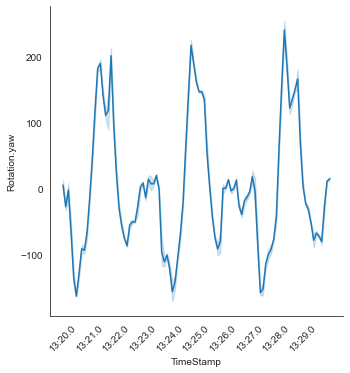

In [16]:
# visualize trends in yaw rotation for forehands
sns.relplot(data=forehand, x='TimeStamp', y='Rotation.yaw', kind='line')
plt.xticks(forehand['TimeStamp'].iloc[0::100].to_list(), rotation=45)

([<matplotlib.axis.XTick at 0x7f9938608810>,
 <a list of 10 Text major ticklabel objects>)

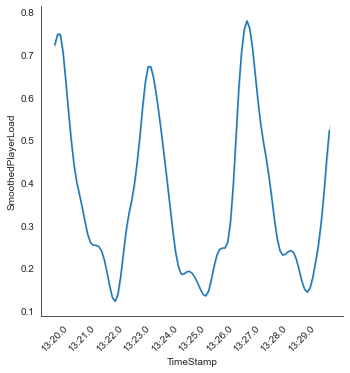

In [15]:
# visualize trends in smoothed player load for forehands
sns.relplot(data=forehand, x='TimeStamp', y='SmoothedPlayerLoad', kind='line')
plt.xticks(forehand['TimeStamp'].iloc[0::100].to_list(), rotation=45)

In [17]:
# select portion for backhand analysis
backhand = swing_detection_data.iloc[100000:101000]
backhand.head()

,TimeStamp,Acceleration.side,Acceleration.up,Rotation.yaw,SmoothedPlayerLoad
100000,16:40.0,-0.070664,0.935572,5.795,0.196821
100001,16:40.0,-0.071632,0.914276,1.830,0.195339
100002,16:40.0,-0.056628,0.899756,-0.122,0.194032
100003,16:40.0,-0.050820,0.910888,0.366,0.192894
100004,16:40.0,-0.043560,0.922504,-2.745,0.191919


([<matplotlib.axis.XTick at 0x7f993a8bc410>,
 <a list of 10 Text major ticklabel objects>)

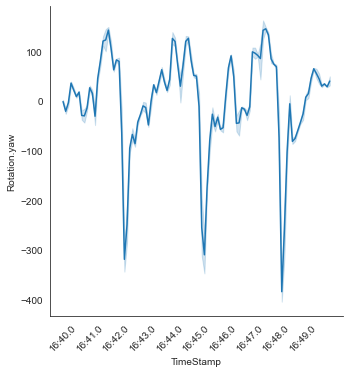

In [20]:
sns.relplot(data=backhand, x='TimeStamp', y='Rotation.yaw', kind='line')
plt.xticks(backhand['TimeStamp'].iloc[0::100].to_list(), rotation=45)

([<matplotlib.axis.XTick at 0x7f9938f91890>,
 <a list of 10 Text major ticklabel objects>)

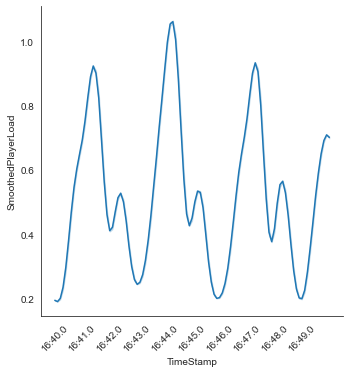

In [21]:
sns.relplot(data=backhand, x='TimeStamp', y='SmoothedPlayerLoad', kind='line')
plt.xticks(backhand['TimeStamp'].iloc[0::100].to_list(), rotation=45)